In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import mediapipe as mp

In [ ]:
mp_drawing = mp.solutions.drawing_utils
 
# Initialize the mediapipe face detection class.
mp_face_detection = mp.solutions.face_detection
 
# Set up the face detection function by selecting the full-range model.
mp_face_detector = mp_face_detection.FaceDetection(min_detection_confidence=0.4)
mp_face_detector

In [ ]:
def mpDnnDetectFaces(image_path, mp_face_detector, display = True):
    '''
    This function performs face(s) detection on an image using mediapipe deep learning based face detector.
    Args:
        image:            The input image with person(s) whose face needs to be detected.
        mp_face_detector: The mediapipe's face detection function required to perform the detection.
        display:          A boolean value that is if set to true the function displays the original input image, 
                          and the output image with the bounding boxes, and key points drawn, and also confidence 
                          scores, and time taken written and returns nothing.
    Returns:
        output_image: A copy of input image with the bounding box and key points drawn and also confidence scores written.
        results:      The output of the face detection process on the input image.
    '''
    image = cv2.imread(image_path)
    
    # Get the height and width of the input image.
    image_height, image_width, _ = image.shape
    #image = cv2.resize(image,(image_height//15,image_width//15),interpolation=cv2.INTER_AREA)
    #image_height, image_width, _ = image.shape
    # Create a copy of the input image to draw bounding box and key points.
    output_image = image.copy()

    # Convert the image from BGR into RGB format.
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



    # Perform the face detection on the image.
    results = mp_face_detector.process(imgRGB)

    # Check if the face(s) in the image are found.
    if results.detections:

        # Iterate over the found faces.
        for face_no, face in enumerate(results.detections):
            # Retrieve the bounding box of the face.
            face_bbox = face.location_data.relative_bounding_box
            #print(face_bbox)
            # Retrieve the required bounding box coordinates and scale them according to the size of original input image.
            x1 = int(face_bbox.xmin*image_width)
            y1 = int(face_bbox.ymin*image_height)
            x2 = x1+int(face_bbox.width*image_width)
            y2 = y1+int(face_bbox.height*image_height)
            #print(x1,y1,x2,y2)
            n = 25
            if y1-25 <= 0:
                y1 = 0
            else:
                y1-=25
            if y2+25>image_height:
                y2=image_height
            else:
                y2+=25
            if x1-25<=0:
                x1=0
            else:
                x1-=25
            if x2+25>image_width:
                x2=image_width
            else:
                x2+=25
            crop = image[y1:y2,x1:x2]
            crop = image[y1:y2,x1:x2]
            #cv2.imwrite(f"./data/test/a{image_path}",crop)
            # Draw a filled rectangle near the bounding box of the face.
            # We are doing it to change the background of the confidence score to make it easily visible
            #cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2) ,
            #              color=(0, 0, 255), thickness=-1)

            # Write the confidence score of the face near the bounding box and on the filled rectangle.
            return crop
    # Check if the original input image and the output image are specified to be displayed.
    if display:        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        return 
    # Otherwise
    else:
        
        # Return the output image and results of face detection.
        
        return 

In [ ]:
vgg = tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=[50,50]+[3],
    classes=1000,
)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False
x = tf.keras.layers.Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = tf.keras.layers.Dense(9, activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0  

In [ ]:
for layer in model.layers:
  layer.trainable = True
x = tf.keras.layers.Flatten()(model.output) #Output obtained on vgg16 is now flattened. 
prediction = tf.keras.layers.Dense(9, activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = tf.keras.models.Model(inputs=model.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [ ]:
PATH = './data/aug/'


In [ ]:
list_ = sorted(os.listdir(PATH))
images = []
labels = []
for file in list_:
    image = cv2.imread(PATH+file)
    image = cv2.resize(image,(75,75),interpolation=cv2.INTER_AREA)
    images.append(image)
    labels.append(int(file.split('_')[0]))
    

In [ ]:
len(images)==len(labels)

True

In [ ]:
df = pd.DataFrame()
df['X'] = images
df['y'] = labels

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
Xtrain = tf.convert_to_tensor(list(train['X']))
ytrain = tf.convert_to_tensor(list(train['y']))
Xtest = tf.convert_to_tensor(list(test['X']))
ytest = tf.convert_to_tensor(list(test['y']))

2023-04-11 14:21:22.261355: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 52920000 exceeds 10% of free system memory.


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy']) 

In [ ]:

history = model.fit(Xtrain,ytrain, epochs=5,validation_data=(Xtest,ytest))

Epoch 1/25
25/25 [==============================] - 68s 2s/step - loss: 1.2742 - accuracy: 0.6416 - val_loss: 22454.1777 - val_accuracy: 0.1224
Epoch 2/25
25/25 [==============================] - 49s 2s/step - loss: 0.4292 - accuracy: 0.9375 - val_loss: 1200.4163 - val_accuracy: 0.1122
Epoch 3/25
25/25 [==============================] - 40s 2s/step - loss: 0.2897 - accuracy: 0.9554 - val_loss: 11.4557 - val_accuracy: 0.1327
Epoch 4/25
25/25 [==============================] - 36s 1s/step - loss: 0.1442 - accuracy: 0.9732 - val_loss: 56.7481 - val_accuracy: 0.2194
Epoch 5/25
25/25 [==============================] - 37s 1s/step - loss: 0.1683 - accuracy: 0.9668 - val_loss: 6.1402 - val_accuracy: 0.4898
Epoch 6/25
25/25 [==============================] - 36s 1s/step - loss: 0.2865 - accuracy: 0.9490 - val_loss: 1.5067 - val_accuracy: 0.7041
Epoch 7/25
25/25 [==============================] - 36s 1s/step - loss: 0.3026 - accuracy: 0.9324 - val_loss: 11.6157 - val_accuracy: 0.4184
Epoch 8/25

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(Xtest)

7/7 [==============================] - 2s 91ms/step


In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'white'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(names.get(predicted_label),
                                100*np.max(predictions_array),
                                true_label),
                                color=color)



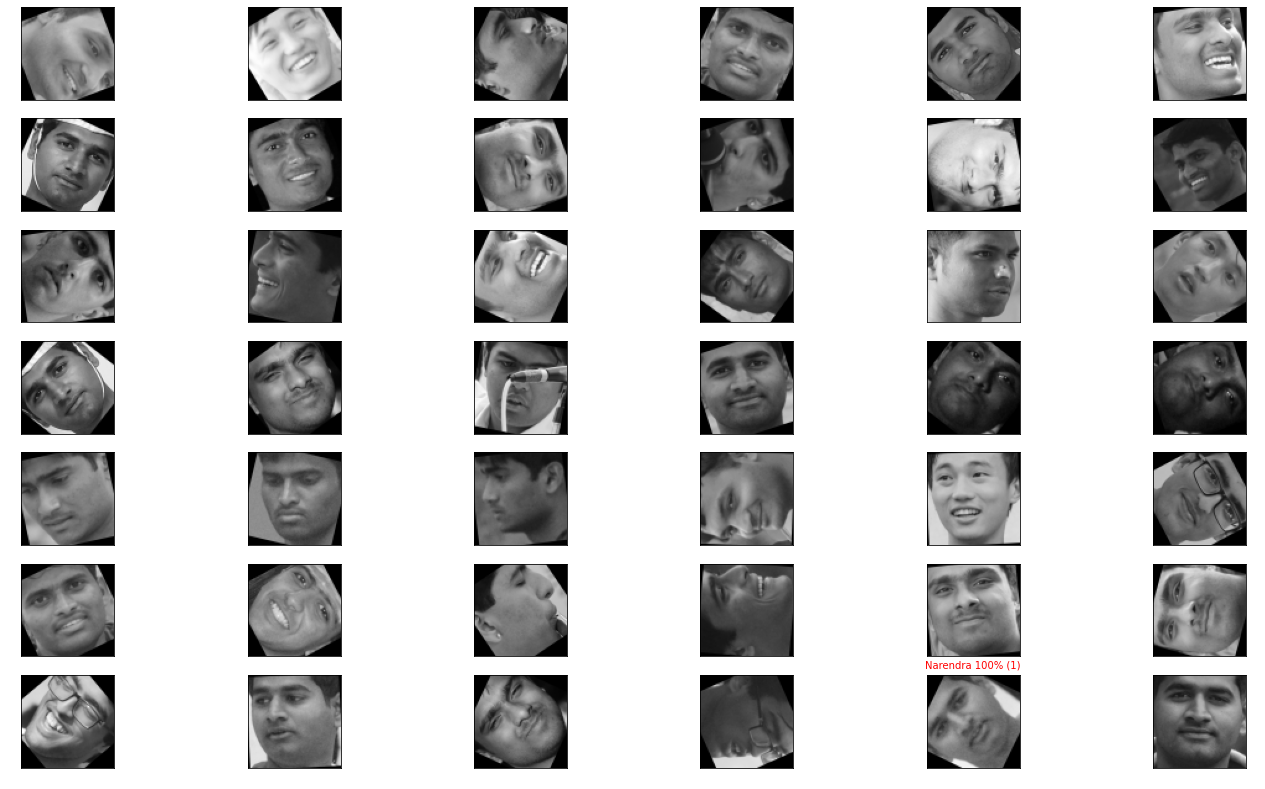

In [ ]:
num_rows = 7
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, ytest, Xtest)

In [ ]:
names = {
    0:'Sri Hari',
    1:'Akash Bairagi',
    2:'Deepam Rai',
    3:'Sainath Reddy',
    4:'Jammi Kunal',
    5:'Parth',
    6:'Narendra',
    7:'Ravi Teja',
    8:'Saikrishna'
}